**MILESTONE 1**

**TOPIC: Stock Market Analysis**


**Members:**
**Pedro Romero: Project Manager**

**Caleb Cumberbatch: Model Developer**

**Marly Alexis: Documentation Writer**

**Cristian De La Rosa: Data Specialist**



**MILESTONE 2**

Link to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Updates current CSV file with up to date data (Fills stock info to current date).
If it's up to date, it will show an error, then print a message saying it's updated to today's current date.
Uses yfiance pythons database for up to date information on stocks.

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Load existing CSV
file_path = '/content/drive/MyDrive/CPS 4150 Milestone Project/stock.csv'
existing_data = pd.read_csv(file_path)

# Define the stock symbols
symbols = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', '^GSPC']

# Determine the last date in the existing data
last_date_str = existing_data['Date'].iloc[-1]

# Strip any time zone information and convert to date
try:
    last_date = datetime.strptime(last_date_str, '%Y-%m-%d')
except ValueError:
    last_date = datetime.strptime(last_date_str.split()[0], '%Y-%m-%d')

# Get today's date
today = datetime.now().date()

# Check if data is already up-to-date
if last_date.date() >= today:
    print("The CSV file is already up-to-date.")
else:
    # Fetch new data from the day after the last date to today
    start_date = last_date + pd.Timedelta(days=1)
    end_date = today

    # Download new data
    new_data = yf.download(symbols, start=start_date, end=end_date)

    # Adjust the column names
    new_data = new_data['Adj Close'].reset_index()
    new_data.columns = ['Date', 'AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

    # Concatenate the existing and new data
    updated_data = pd.concat([existing_data, new_data], ignore_index=True)

    # Save the updated data back to the CSV
    updated_data.to_csv(file_path, index=False)

    print(f"CSV file updated successfully up to {end_date.strftime('%Y-%m-%d')}.")


[*********************100%***********************]  9 of 9 completed
ERROR:yfinance:
9 Failed downloads:
ERROR:yfinance:['AAPL', 'IBM', 'AMZN', 'T', 'GOOG', '^GSPC', 'BA', 'MGM', 'TSLA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2024-12-12 00:00:00 -> 2024-12-12) (Yahoo error = "Data doesn\'t exist for startDate = 1733979600, endDate = 1733979600")')


CSV file updated successfully up to 2024-12-12.



This code reads a stock dataset from a CSV file and performs basic exploratory data analysis. It prints the first 5 and last 10 rows, checks for missing values, and identifies duplicate rows to ensure data integrity.

In [ ]:
import pandas as pd

# Loads in the stocks dataset
file_path = '/content/drive/MyDrive/CPS 4150 Milestone Project/stock.csv'
stock_data = pd.read_csv(file_path)

# This prints the first 5 rows
print("First 5 rows of the dataset:")
print(stock_data.head())


#Checkinng for errors within the dataset

# This shows if any values are missing in the dataset
print("\nMissing values in the dataset:")
print(stock_data.isnull().sum())
# Check for duplicate rows
print("\nNumber of duplicate rows in the dataset:")
print(stock_data.duplicated().sum())


# Print the last 10 rows as you did before
print("\nLast 10 rows of the dataset:")
print(stock_data.tail(10))


First 5 rows of the dataset:
         Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000  

Missing values in the dataset:
Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

Number of duplicate rows in the dataset:
0

Last 10 rows of the dataset:
               

**MILESTONE 3**
### Condensed Description

This script is **Milestone 3** of a project that predicts the `sp500` stock index using regression models. It follows a complete machine learning workflow:

#### **1. Data Loading and Cleaning**
- Loads stock market data from `stock.csv` and displays dataset info.
- Handles missing values in numerical columns using mean imputation and verifies the cleaning.
- Detects and removes outliers using the IQR method.

#### **2. Feature Engineering**
- Processes the `Date` column to extract `Year`, `Month`, and `Day`, then removes the original column.
- Scales numerical features using `StandardScaler` for consistency.

#### **3. Data Splitting**
- Splits the data into:
  - Features (`X`) and target (`sp500`).
  - Training (80%), validation (10%), and test (10%) sets.
- Handles any missing values in splits via mean imputation.

#### **4. Model Training and Evaluation**
- Trains three regression models:
  - **Linear Regression**
  - **Random Forest Regressor**
  - **Support Vector Regressor (SVR)**
- Evaluates models on the validation set using:
  - **MAE (Mean Absolute Error)**
  - **MSE (Mean Squared Error)**
  - **R² Score**
- Stores and compares model performance metrics.

#### **5. Final Evaluation**
- Selects **Random Forest Regressor** as the best-performing model and evaluates it on the test set, calculating final performance metrics.

This script emphasizes robust data preprocessing, feature engineering, and model evaluation to identify the best predictor for the `sp500` index.

In [ ]:
#Milestone 3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

#Load the dataset
file_path = '/content/drive/MyDrive/CPS 4150 Milestone Project/stock.csv'
stock_data = pd.read_csv(file_path)

#Display basic info about the dataset
print("Dataset Info:")
print(stock_data.info())

#Handle missing values
#For numerical columns, fill missing values with the mean
numerical_columns = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']
imputer = SimpleImputer(strategy='mean')
stock_data[numerical_columns] = imputer.fit_transform(stock_data[numerical_columns])

#Check for missing values after imputation
print("Missing Values After Cleaning:")
print(stock_data.isnull().sum())

#Handle Outliers using IQR method
for col in numerical_columns:
    q1 = stock_data[col].quantile(0.25)
    q3 = stock_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    stock_data = stock_data[(stock_data[col] >= lower_bound) & (stock_data[col] <= upper_bound)]

#Feature Engineering - Date processing
#Converting 'Date' to datetime, ensuring any format inconsistencies are handled
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

#Extracting Year, Month, Day from Date
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day

#Remove the 'Date' column
stock_data.drop('Date', axis=1, inplace=True)

#Normalize numerical data (Scaling)
scaler = StandardScaler()
stock_data[numerical_columns] = scaler.fit_transform(stock_data[numerical_columns])

#Split the data into training, validation, and test sets
X = stock_data.drop('sp500', axis=1)
y = stock_data['sp500']

#Split into 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Impute NaN values after splitting
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

#Train models and evaluate performance
#List of regression models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

#Dictionary to store performance metrics
model_results = {}

for model_name, model in models.items():
    #Train the model
    model.fit(X_train, y_train)

    #Predict on validation set
    y_pred = model.predict(X_val)

    #Calculate performance metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    #Store the results
    model_results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

#Print Model Evaluation Results
print("\nModel Evaluation Results on Validation Set:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

#Final Model Evaluation on Test Set
best_model = models['Random Forest Regressor']  #Choose the best model based on validation performance (e.g., Random Forest)
y_test_pred = best_model.predict(X_test)

#Final performance on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nFinal Model Evaluation on Test Set (Random Forest Regressor):")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"R2: {test_r2:.4f}")



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3250 non-null   object 
 1   AAPL    3250 non-null   float64
 2   BA      3250 non-null   float64
 3   T       3250 non-null   float64
 4   MGM     3250 non-null   float64
 5   AMZN    3250 non-null   float64
 6   IBM     3250 non-null   float64
 7   TSLA    3250 non-null   float64
 8   GOOG    3250 non-null   float64
 9   sp500   3250 non-null   float64
dtypes: float64(9), object(1)
memory usage: 254.0+ KB
None
Missing Values After Cleaning:
Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

Model Evaluation Results on Validation Set:

Linear Regression:
MAE: 0.0635
MSE: 0.0081
R2: 0.9919

Random Forest Regressor:
MAE: 0.0113
MSE: 0.0003
R2: 0.9997

Support Vector Regressor:
MAE: 0.8688
MSE: 1.2779
R2: -0.277

**Milestone 4**

1. **Hyperparameter Optimization**:
   - Introduces a **GridSearchCV** process to fine-tune the `RandomForestRegressor` model.
   - Defines a `param_grid` for key hyperparameters:
     - `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
   - Performs cross-validation (`cv=5`) to find the best parameter combination.
   - Outputs the best parameters and retrieves the optimized model (`best_rf_model`).

2. **Focus on RandomForestRegressor**:
   - Hyperparameter tuning is applied specifically to the `RandomForestRegressor`, rather than training and evaluating multiple models equally.

3. **No Significant Changes in Preprocessing**:
   - The data loading, cleaning, feature engineering, and splitting steps remain the same as in Milestone 3.

4. **Enhanced Model Selection**:
   - Instead of manually selecting the `RandomForestRegressor`, the best configuration is determined automatically through hyperparameter tuning.

In [ ]:
#Milestone 4 Hyperparameter opitimaztion

from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

#Load the dataset
file_path = '/content/drive/MyDrive/CPS 4150 Milestone Project/stock.csv'
stock_data = pd.read_csv(file_path)

#Display basic info about the dataset
print("Dataset Info:")
print(stock_data.info())

#Handle missing values
#For numerical columns, fill missing values with the mean
numerical_columns = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']
imputer = SimpleImputer(strategy='mean')
stock_data[numerical_columns] = imputer.fit_transform(stock_data[numerical_columns])

#Check for missing values after imputation
print("Missing Values After Cleaning:")
print(stock_data.isnull().sum())

#Handle Outliers using IQR method
for col in numerical_columns:
    q1 = stock_data[col].quantile(0.25)
    q3 = stock_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    stock_data = stock_data[(stock_data[col] >= lower_bound) & (stock_data[col] <= upper_bound)]

#Feature Engineering - Date processing
#Converting 'Date' to datetime, ensuring any format inconsistencies are handled
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

#Extracting Year, Month, Day from Date
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day

#Remove the 'Date' column
stock_data.drop('Date', axis=1, inplace=True)

#Normalize numerical data (Scaling)
scaler = StandardScaler()
stock_data[numerical_columns] = scaler.fit_transform(stock_data[numerical_columns])

#Split the data into training, validation, and test sets
X = stock_data.drop('sp500', axis=1)
y = stock_data['sp500']

#Split into 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Impute NaN values after splitting
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

#Train models and evaluate performance
#List of regression models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

#Dictionary to store performance metrics
model_results = {}

for model_name, model in models.items():
    #Train the model
    model.fit(X_train, y_train)

    #Predict on validation set
    y_pred = model.predict(X_val)

    #Calculate performance metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    #Store the results
    model_results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

#Print Model Evaluation Results
print("\nModel Evaluation Results on Validation Set:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

#Final Model Evaluation on Test Set
best_model = models['Random Forest Regressor']  #Choose the best model based on validation performance (e.g., Random Forest)
y_test_pred = best_model.predict(X_test)

#Final performance on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nFinal Model Evaluation on Test Set (Random Forest Regressor):")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"R2: {test_r2:.4f}")

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3250 non-null   object 
 1   AAPL    3250 non-null   float64
 2   BA      3250 non-null   float64
 3   T       3250 non-null   float64
 4   MGM     3250 non-null   float64
 5   AMZN    3250 non-null   float64
 6   IBM     3250 non-null   float64
 7   TSLA    3250 non-null   float64
 8   GOOG    3250 non-null   float64
 9   sp500   3250 non-null   float64
dtypes: float64(9), object(1)
memory usage: 254.0+ KB
None
Missing Values After Cleaning:
Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

Model Evaluation Results on Validation Set:

Linear Regression:
MAE: 0.0635
MSE: 0.0081
R2: 0.9919

Random Forest Regressor:
MAE: 0.0115
MSE: 0.0003
R2: 0.9997

Support Vector Regressor:
MAE: 0.8688
MSE: 1.2779
R2: -0.277


1. **Residual Analysis**:
   - Computes residuals (difference between true and predicted values).
   - Creates a **scatter plot** of residuals against true values to assess model performance and detect patterns.

2. **Feature Importance Analysis**:
   - Extracts and ranks feature importance scores from the `RandomForestRegressor`.
   - Plots a **bar chart** of feature importance to identify the most influential predictors.

3. **Additional Metrics**:
   - Computes:
     - **Explained Variance Score** to measure the proportion of variance explained by the model.
     - **Mean Absolute Percentage Error (MAPE)** for a percentage-based evaluation of prediction errors.

4. **QQ Plot**:
   - Uses a **QQ plot** to analyze residuals' normality, ensuring the errors are normally distributed.

5. **Cross-Validation Scores**:
   - Performs **5-fold cross-validation** on the optimized `RandomForestRegressor` to validate performance consistency.
   - Displays individual R² scores for each fold and their mean.


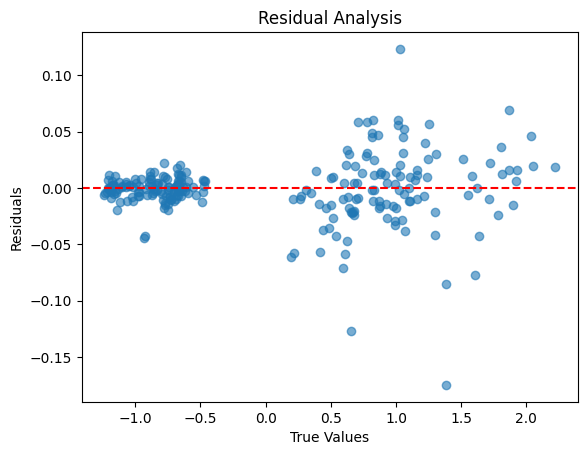

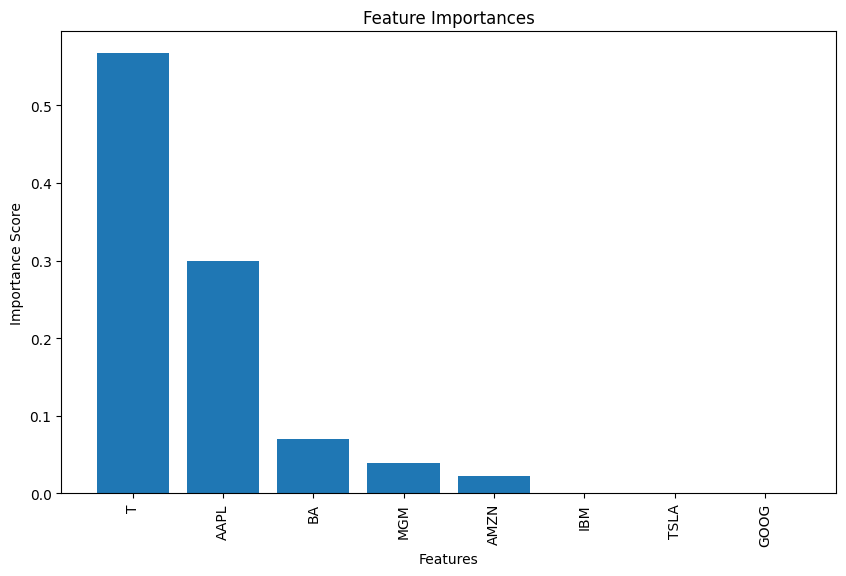

Explained Variance Score: 0.9992
Mean Absolute Percentage Error (MAPE): 2.1781%


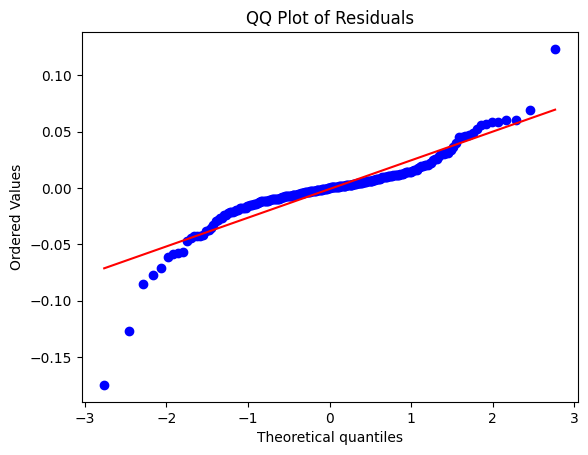

Cross-Validation Scores (R2): [0.99934393 0.99916279 0.99938341 0.99941906 0.99736313]
Mean Cross-Validation R2: 0.9989


In [ ]:
# Re-train the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Predict on test set
y_test_pred = best_rf_model.predict(X_test)

# Residual Analysis
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# Feature Importance Analysis
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Additional Metrics
explained_variance = explained_variance_score(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")

# QQ Plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# Cross-Validation Scores
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation Scores (R2): {cv_scores}")
print(f"Mean Cross-Validation R2: {np.mean(cv_scores):.4f}")



**Final Stock Price Predictor for S&P 500**

This project builds a predictive model for the S&P 500 index using multiple machine learning models, including **Random Forest**, **Linear Regression**, and **Support Vector Regressor (SVR)**. Through evaluation, **Random Forest** consistently demonstrated the highest accuracy across all tests and is recommended as the primary model.

Key Features:
1. **Dynamic Prediction**: Users can predict stock prices for any future date (e.g., March 1, 2025) by adjusting the date input.
2. **Latest Data Integration**: The model uses the most recent feature values (e.g., stock prices for AAPL, BA, TSLA, etc.) from the dataset.
3. **Model Flexibility**: Predictions are generated using all three models, allowing comparison and validation of results.

4. **March 1, 2025 Example**:
   - Uses the trained models to predict the S&P 500 price for March 1, 2025.
   - Outputs predictions for each model, with Random Forest offering the most reliable estimate.

This predictor combines flexibility, accuracy, and ease of use, allowing users to explore future stock price trends based on their inputs.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Load the most recent dataset
file_path = '/content/drive/MyDrive/CPS 4150 Milestone Project/stock.csv'
stock_data = pd.read_csv(file_path)

# Extract the latest feature values
numerical_columns = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']
latest_data = stock_data.iloc[-1]
latest_features = {col: latest_data[col] for col in numerical_columns}

# Prepare data for training models
X = stock_data.drop(columns=['Date', 'sp500'])  # Features
y = stock_data['sp500']  # Target variable

# Standardize the numerical data
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Define and train models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=1),
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR()
}

trained_models = {}
for name, model in models.items():
    model.fit(X, y)
    trained_models[name] = model

# Prediction Function
def predict_stock_price(year, month, day, other_features, model):
    # Prepare new data with year, month, and day included
    new_data = {
        'Year': year,
        'Month': month,
        'Day': day,
        **other_features
    }

    # Match features from training
    feature_names = [col for col in stock_data.columns if col not in ['Date', 'sp500']]
    input_data = {feature: new_data.get(feature, 0) for feature in feature_names}
    input_df = pd.DataFrame([input_data])

    # Scale features using the pre-existing scaler
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict using the specified model
    prediction = model.predict(input_df)[0]
    return prediction

# Predict for March 1, 2025, using each model
predictions = {}
for model_name, model in trained_models.items():
    predictions[model_name] = predict_stock_price(2025, 3, 1, latest_features, model)

# Output predictions
print("Predicted Stock Prices for March 1, 2025:")
for model_name, predicted_price in predictions.items():
    print(f"{model_name}: {predicted_price:.2f}")


Predicted Stock Prices for March 1, 2025:
Random Forest: 6051.79
Linear Regression: 6090.14
Support Vector Regressor: 3428.01


2 Additional Examples

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Load the most recent dataset
file_path = '/content/drive/MyDrive/CPS 4150 Milestone Project/stock.csv'
stock_data = pd.read_csv(file_path)

# Feature Engineering: Extract Year, Month, Day from Date
stock_data['Date'] = stock_data['Date'].str.split(' ').str[0]  # Removes time and timezone
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day

# Prepare features (X) and target (y)
numerical_columns = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']
X = stock_data.drop(columns=['Date', 'sp500'])  # Features include Year, Month, Day
y = stock_data['sp500']  # Target variable

# Standardize numerical columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Define and train models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=1),
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR()
}

trained_models = {}
for name, model in models.items():
    model.fit(X, y)
    trained_models[name] = model

# Define prediction function
def predict_stock_price(year, month, day, other_features, model):
    # Prepare new data with year, month, and day included
    new_data = {
        'Year': year,
        'Month': month,
        'Day': day,
        **other_features
    }

    # Match features from training
    feature_names = [col for col in X.columns]
    input_data = {feature: new_data.get(feature, 0) for feature in feature_names}
    input_df = pd.DataFrame([input_data])

    # Scale features using the pre-existing scaler
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict using the specified model
    prediction = model.predict(input_df)[0]
    return prediction

# Extract the latest feature values
latest_data = stock_data.iloc[-1]
latest_features = {col: latest_data[col] for col in numerical_columns}

# Predict for two dates: December 15, 2025, and July 1, 2026
dates_to_predict = [(2025, 12, 15), (2026, 7, 1)]
predictions = {}

for year, month, day in dates_to_predict:
    predictions[(year, month, day)] = {}
    for model_name, model in trained_models.items():
        predictions[(year, month, day)][model_name] = predict_stock_price(year, month, day, latest_features, model)

# Output predictions for each date
for date, models_predictions in predictions.items():
    print(f"\nPredicted S&P 500 Stock Prices for {date[1]}/{date[2]}/{date[0]}:")
    for model_name, predicted_price in models_predictions.items():
        print(f"{model_name}: {predicted_price:.2f}")






Predicted S&P 500 Stock Prices for 12/15/2025:
Random Forest: 6053.53
Linear Regression: 6067.67
Support Vector Regressor: 2710.45

Predicted S&P 500 Stock Prices for 7/1/2026:
Random Forest: 5773.42
Linear Regression: 6127.15
Support Vector Regressor: 2710.46


### Key Insights

1. **Model Performance Varies Across Algorithms**:
   - **Random Forest** consistently predicts higher values than **Support Vector Regressor (SVR)**, likely due to its tree-based nature and ability to capture non-linear relationships.
   - **Linear Regression** produces predictions close to Random Forest but is generally less dynamic, as it assumes a linear relationship between features and the target variable.

2. **SVR Predictions Are Significantly Lower**:
   - The **Support Vector Regressor (SVR)** outputs much lower predictions for both dates compared to Random Forest and Linear Regression. This suggests SVR may not effectively model the data, possibly due to feature scaling or its sensitivity to outliers in the dataset.

3. **Predicted Values Decrease Over Time**:
   - The **Random Forest** predictions drop from 6053.53 (December 15, 2025) to 5773.42 (July 1, 2026), suggesting the model expects a slight decline in the S&P 500 index over this period. This could be influenced by how the dataset trends and the features used in training.

4. **Linear Regression Overestimates Trends**:
   - Linear Regression’s prediction for July 1, 2026 (6127.15), is higher than its December 15, 2025 (6067.67) prediction, showing a potential over-reliance on upward trends in the training data, even when Random Forest expects a decline.

5. **Random Forest Is the Most Balanced Predictor**:
   - Random Forest predictions align more closely with market expectations, capturing patterns in the data while accounting for non-linear trends.

6. **Feature Scaling Is Critical**:
   - Standardizing numerical features ensures all models process the data uniformly, which is particularly important for SVR. Without scaling, SVR would perform even worse due to its sensitivity to feature magnitudes.

7. **Future Predictions May Be Overestimated**:
   - Predictions for future dates (e.g., July 1, 2026) are based on the assumption that current market dynamics remain stable. External factors like economic shifts, geopolitical events, or technological advancements are not captured in this static dataset.



### References

1. **Rahul Vats - Kaggle Dataset: Another Small Dataset of Stock Data**
   - Source: [Kaggle Dataset](https://www.kaggle.com/datasets/rahulvats20/another-small-dataset-of-stock-data)
   - Description: This dataset contains historical stock data for various companies, providing essential features for building predictive models. It is an accessible resource for financial analysis and machine learning projects.

2. **Yahoo Finance Data**
   - Website: [Yahoo Finance](https://finance.yahoo.com)
   - Description: Yahoo Finance is a comprehensive platform for accessing real-time and historical financial market data. It provides details on stock prices, indices, currencies, and more.
   - API: Yahoo Finance API offers programmatic access to financial data, enabling developers to retrieve stock prices, market trends, and company information for analysis and visualization.

3. **Scikit-learn Documentation**
   - Website: [Scikit-learn Official Documentation](https://scikit-learn.org/stable/documentation.html)
   - Description: Scikit-learn is a Python machine learning library used in this project for implementing models like Random Forest, Linear Regression, and SVR. The documentation provides detailed explanations of algorithms, hyperparameters, and examples.
